## 20143692_Kangkyeungseok
## Machine Learning Assignment 05
## K-means algorithm on color image

In [168]:
#import library
import matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

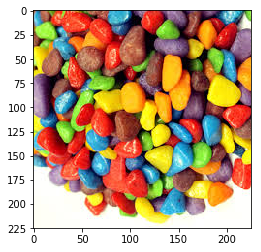

In [169]:
#find color image and read.
image=cv2.imread('C:\\Users\\rkdru\\Desktop\\test\\images.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [170]:
#check image size and define size_row, size_col
size_row=len(image[:,:,:])
size_col=len(image[0,:,:])

In [171]:
#define function about normalize& distance
def normalize(data):
    data_normalized=(data-min(data))/(max(data)-min(data))
    return data_normalized
def distance(x,y):
    d=(x-y)**2
    s=np.sum(d)
    return s

In [172]:
def Clustering_image_about_kmeans(k):
    global plot_data_energy
    plot_data_energy=[]
    label_image=np.empty((size_row,size_col),dtype=int)
    cluster=[]
    for i in range(0,k):
        temp=[]
        cluster.append(temp)
    for i in range(0,size_row):
        for j in range(0,size_col):
            label_image[i,j]=random.randrange(0,k)
            cluster[label_image[i,j]].append(image[i,j])

    Initial_Clustering(cluster,k)

In [173]:
def Initial_Clustering(cluster,k):
    centroid=np.zeros((k,3),dtype=float)
    for i in range(k):
        for j in range(len(cluster[i][0])):
            centroid[i]+=cluster[i][j]
        centroid[i]/=len(cluster[j])
    Energy(centroid,k,cluster)

In [174]:
def label(x,k,centroid):
    args=[]
    temp=0
    
    for i in range(k):
        temp = distance(x,centroid[i])
        args.append(temp)
        temp=0
    return np.argmin(args)

In [175]:
#clustering image
def Clustering(centroid,k):
    centroid2=np.zeros((k,3),dtype=float)
    cluster=[]
    for i in range(0,k):
        temp=[]
        cluster.append(temp)
        
    for i in range(0,size_row):
        for j in range(0,size_col):
            temp=label(image[i,j],k,centroid)
            cluster[temp].append(image[i,j])
            
    for i in range(k):
        for j in range(len(cluster[i])):
            centroid2[i]+=cluster[i][j]
            
        if(len(cluster[i])!=0):
            centroid2[i]/=len(cluster[i])
    #if energy value is no change then,,        
    if np.array_equal(centroid,centroid2):
        print("There is no change in Energy.. so Finish the calculation")
        plot()
        plot_centroid(centroid2,k)
        return centroid2
    else:
        Energy(centroid2,k,cluster)

In [176]:
#calculate Energy value
def Energy(centroid,k,cluster):
    energy=0
    for i in range(k):
        for j in range(len(cluster[i])):
            energy+=distance(cluster[i][j],centroid[i])
    energy_value=energy/(size_col*size_row)
    plot_data_energy.append(energy)
    
    print(energy_value)
    Clustering(centroid,k)

In [177]:
def plot():
    plt.figure(figsize=(10,8))
    plt.tight_layout
    plt.subplot(111)
    plt.title("Energy")
    plt.plot(range(0,len(plot_data_energy)),plot_data_energy)
    plt.show()

In [178]:
def plot_centroid(centroid,k):
    image_c=image.copy()
    for i in range(0,size_row):
        for j in range(0,size_col):
            image_c[i,j]=centroid[label(image[i,j],k,centroid)]
            
    plt.title("clustering image")        
    plt.imshow(image_c)
    plt.show()

73635.29928779807
17448.005711825423
12602.820777078374
11190.098459656727
10552.713909529353
10185.131660887417
9939.499790699398
9798.733297948625
9730.377111156731
9699.650128784151
9685.750856427501
9680.26286838936
9677.915654435745
9676.856244749213
9676.486742012765
9676.300001926795
9676.19090223866
9676.10862104756
9676.03616799608
9676.009469466338
9675.998329922752
9675.988644423953
9675.983885629175
9675.98038247148
9675.978401433431
9675.977184829622
9675.975038415929
9675.974022430673
9675.973835823499
9675.973752179427
There is no change in Energy.. so Finish the calculation


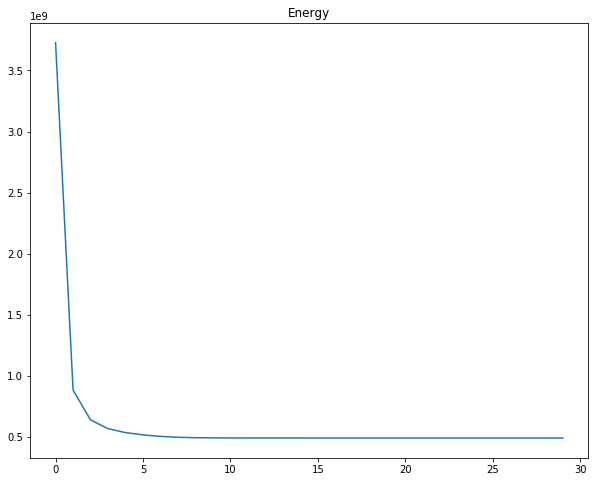

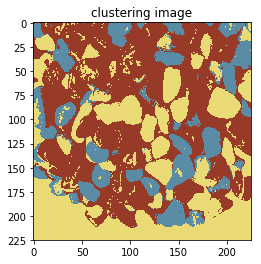

In [183]:
# Test 1 , k=3
Clustering_image_about(3)

73624.98986677075
12221.618079108795
6849.073006544
5827.182183558108
5329.007465663911
5084.782961149383
4879.89687514323
4529.7843481538985
4158.662530539611
3992.459226906376
3936.4629786099044
3916.865427429176
3910.2268955015866
3908.476939465622
3907.928600959227
3907.7372234118816
3907.6766189605974
3907.655936092945
3907.650110542918
3907.6497171329497
3907.6496237567912
3907.649575697589
3907.6494947311226
3907.6493610516736
There is no change in Energy.. so Finish the calculation


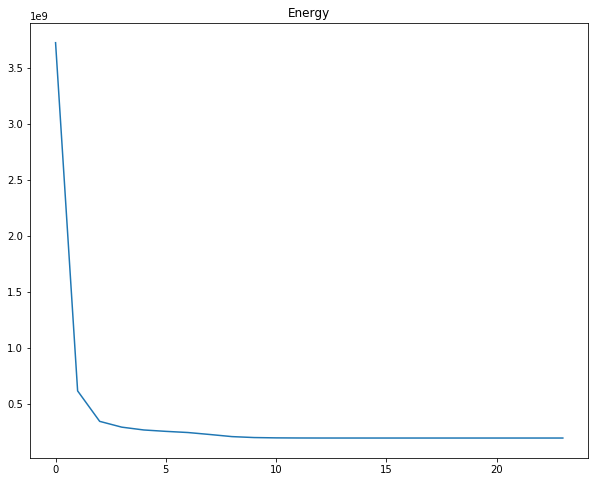

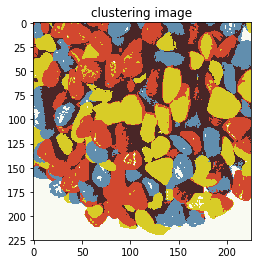

In [184]:
# Test 2 , k=5
Clustering_image_about(5)

73597.05360049933
16760.481907585025
10816.715063291467
9100.217045950387
7653.208084675591
6742.983429087768
6198.475924723181
5776.9124940629645
5312.752112333215
4559.206364184816
3726.0986790737493
3236.194665090818
2841.222455153748
2559.641946187689
2390.343074193618
2289.95571417618
2212.947729304076
2123.2157504974475
2023.2920037055817
1987.8098572128802
1967.2084168375754
1954.4112335961515
1946.5921076170473
1941.9550948121132
1939.0664722948927
1937.265190069294
1936.0535016116696
1935.2186793535448
1934.5244485896005
1933.8782063867313
1933.2366117872443
1932.508259473477
1931.1738743213696
1928.7691645514494
1925.136661293024
1919.3483205196837
1910.8832062041197
1900.8388642043626
1889.3874599555702
1877.4861039527855
1868.5724650737418
1863.5073714244963
1859.883569960306
1856.8131521960725
1854.5292125755723
1852.5906170913472
1850.7804428849654
1849.4419579452294
1848.454458305393
1847.3616701589208
1846.5004712369312
1845.8418849214331
1845.2929684903181
1844.8306255

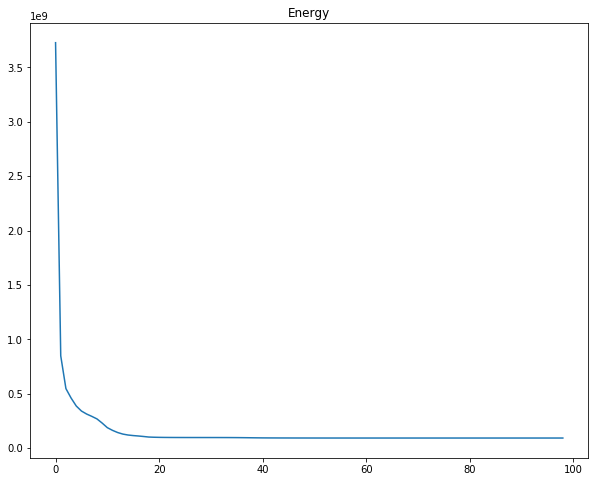

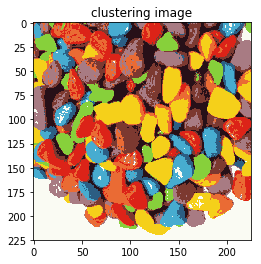

In [185]:
# Test 3 , k=10
Clustering_image_about(10)

73539.05256386021
11087.378274711444
5309.8372666496125
4677.483725628372
4413.145663330645
4058.8783985037976
3478.4041708630843
2983.933037465799
2633.3496396265014
2401.2960925521675
2232.9592520788087
2107.644640437327
1998.4108721262198
1904.7801417998617
1830.9446811454832
1780.86419027664
1743.222178235213
1715.1810608530257
1691.8628956052992
1669.3396467145535
1642.4815553092797
1603.3349455065434
1540.488794845732
1484.8571270422292
1440.7402776887968
1396.4100413070216
1349.2135543259465
1305.4304920905684
1270.1847165218094
1243.4423686577868
1223.7041548728298
1207.291944158285
1193.1700026063843
1179.1447519855612
1166.932542056594
1155.5561265640504
1144.6727837048857
1134.2497371209329
1121.6780328571713
1105.6570282540865
1086.7525578394552
1069.6950982146748
1056.4626195936737
1045.1551679181787
1034.9142015365965
1026.4283400418474
1019.9690276816957
1014.3241141222597
1008.5165485953817
1002.7149311022473
996.8980527212282
990.1043286821438
982.9024671714798
976.042

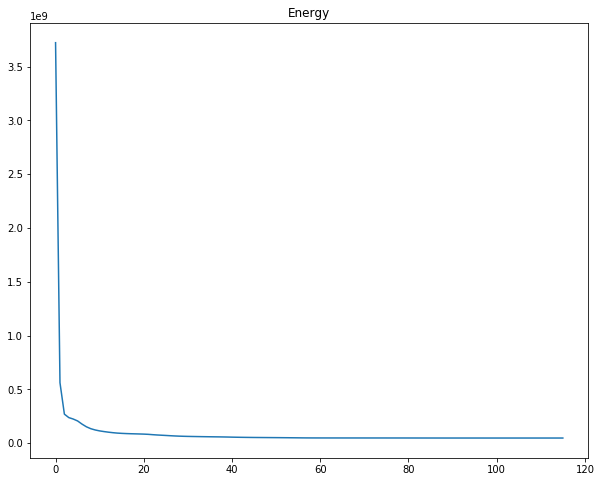

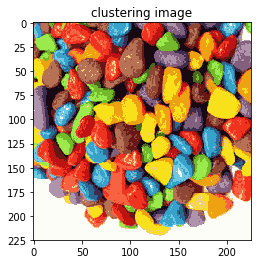

In [186]:
# Test 4 , k=20
Clustering_image_about(20)

73439.91618920167
11832.867415948745
5908.954461457878
4588.8844163065205
3658.6703507683237
2960.397535686684
2732.596771796074
2613.9992134777654
2540.687411049612
2494.5142636879823
2459.712820489466
2429.710028033479
2394.445575379339
2344.2950458001114
2254.471784236191
2144.6684333793437
1988.2189448739593
1783.226510162821
1579.269753067613
1429.5390631226671
1357.3162994278143
1307.1301354450793
1268.8696181224614
1237.7559263929702
1210.6471687611959
1186.2531310933812
1165.0972365711887
1145.8201177635956
1127.001594936869
1105.7708522768553
1080.7647651246061
1056.220420866038
1036.287473337044
1018.9976200425427
1002.890153910071
987.5832293913697
973.6721173732695
959.8860068625271
946.6132435986526
932.9723265338879
919.9174772486265
906.8299581773433
893.8896598433964
881.1052892795608
866.2849034038828
846.7954419046895
818.009840926764
790.6121536616151
773.5200735174286
758.925097555065
745.5796774740629
734.2312007958058
723.9494988066235
713.2649556060645
701.609708

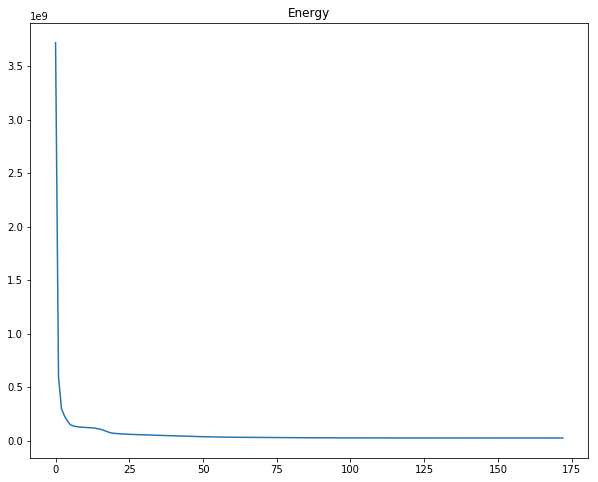

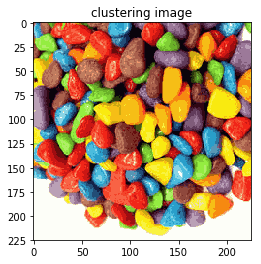

In [187]:
# Test 5 , k=40
Clustering_image_about(40)